# Workbench for the new LIME explainer

## Set up the paths

In [1]:
import os
import pathlib
import random
import sys

Add the local `inspection` Python package to the `PYTHONPATH` so that we can import it:

In [2]:
os.getcwd()

'C:\\Users\\Matze\\Documents\\University\\Work\\QC\\xai-demonstrator\\visual-inspection\\explainers'

In [3]:
INSPECTION_PATH = pathlib.Path(os.getcwd()).parent / "inspection-backend" 

In [4]:
sys.path.append(str(INSPECTION_PATH.absolute()))

## Load the necessary parts from `inspection`

In [5]:
from inspection.model.model import model
from inspection.model.predict import predict_class, preprocess

Test the model with a random image

In [6]:
import numpy as np

rng = np.random.default_rng()
random.seed(1)

In [7]:
img = rng.random((1, 224, 224, 3))


In [8]:
prediction = model.predict(img)


## Load the new LIME

In [9]:
from inspection.explainer.explainers.new_lime_ import create_segments, generate_samples, generate_images, predict_images, weigh_segments, generate_visual_explanation
from PIL import Image
from skimage import img_as_float
import matplotlib.pyplot as plt
import time

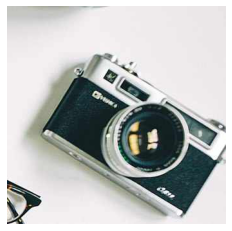

In [10]:
img = Image.open("C:\\Users\\Matze\\Documents\\University\\Work\\BeispielBilder\\cam.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()
#img = np.squeeze(img)
img = preprocess(img)
#img.shape

In [11]:
predict_class(img)

'eine Foto-Kamera'

In [12]:
np.argmax(model.predict(img))
img = np.squeeze(img)

In [13]:

s = time.time()
segment_mask = create_segments(img, "felzenszwalb", {})
print("create_segments: ",time.time() - s)

create_segments:  0.07703065872192383


In [14]:
s = time.time()
samples = generate_samples(segment_mask, 200, 0.5)
print("generate_samples: ",time.time() - s)

generate_samples:  0.0049664974212646484


In [15]:
s = time.time()
images = generate_images(img, segment_mask, samples)
print("generate_images: ",time.time() - s)

generate_images:  2.772368907928467


In [16]:
s = time.time()
predictions = predict_images(images, model)
print("predict_images: ",time.time() - s)

predict_images:  4.354853630065918


In [17]:
s = time.time()
coef = weigh_segments(samples, predictions)
print("weigh_segments: ",time.time() - s)

weigh_segments:  0.03712916374206543


In [18]:
s = time.time()
result_layer = generate_visual_explanation(coef, segment_mask, img, 0.3, 45, "red")
print("generate_visual_explanation: ",time.time() - s)

generate_visual_explanation:  0.2880399227142334


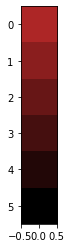

In [20]:
gradient=[
np.ones((1,1)) * [173, 38, 38] / 255*1.0,
np.ones((1,1)) * [173, 38, 38] / 255*0.8,
np.ones((1,1)) * [173, 38, 38] / 255*0.6,
np.ones((1,1)) * [173, 38, 38] / 255*0.4,
np.ones((1,1)) * [173, 38, 38] / 255*0.2,
np.ones((1,1)) * [173, 38, 38] / 255*0.0,
]

plt.imshow(gradient)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


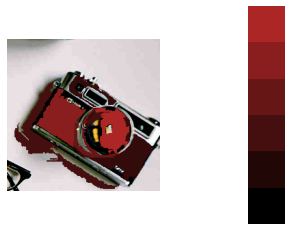

In [21]:
f, axarr = plt.subplots(1,2)
axarr[0].axis("off")
axarr[1].axis("off")
axarr[0].imshow(result_layer)
axarr[1].imshow(gradient)